In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
# List of technologies

df = pd.read_csv("jobs.csv")
df = df.explode("technologies")
df["technologies"] = df["technologies"].str.split(",")
df = df.explode("technologies")
tech_counts = df["technologies"].value_counts()
pd.set_option("display.max_rows", None)
print(tech_counts)

technologies
Python                           30
Django                           13
PostgreSQL                       13
Git                              13
JavaScript                       12
Програмування                    10
Docker                            9
Робота в команді                  8
Django Rest Framework             8
Знання принципів ООП              8
MySQL                             7
Flask                             7
SQL                               6
Користувач ОС Linux               6
Комунікабельність                 6
REST                              5
Selenium                          4
MongoDB                           4
React                             4
AWS                               4
CSS                               4
HTML                              4
FastAPI                           4
Відповідальність                  3
Celery                            3
Responsibility                    3
SOLID Principles                  3
SQLAlchemy     

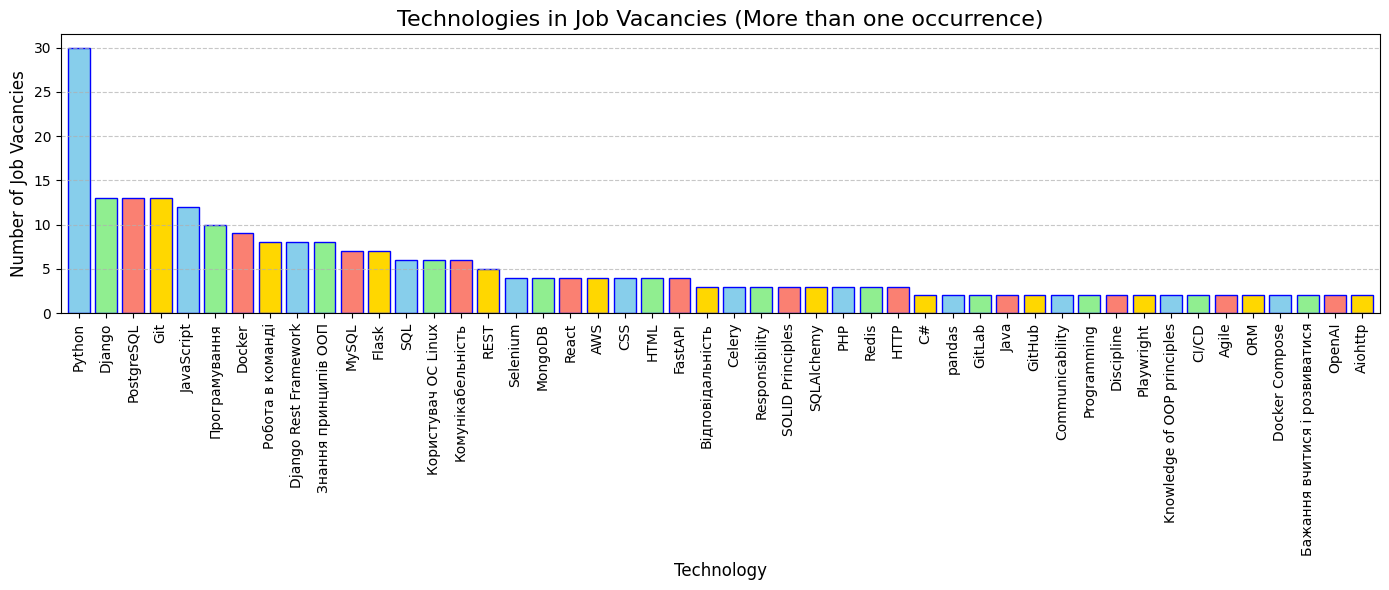

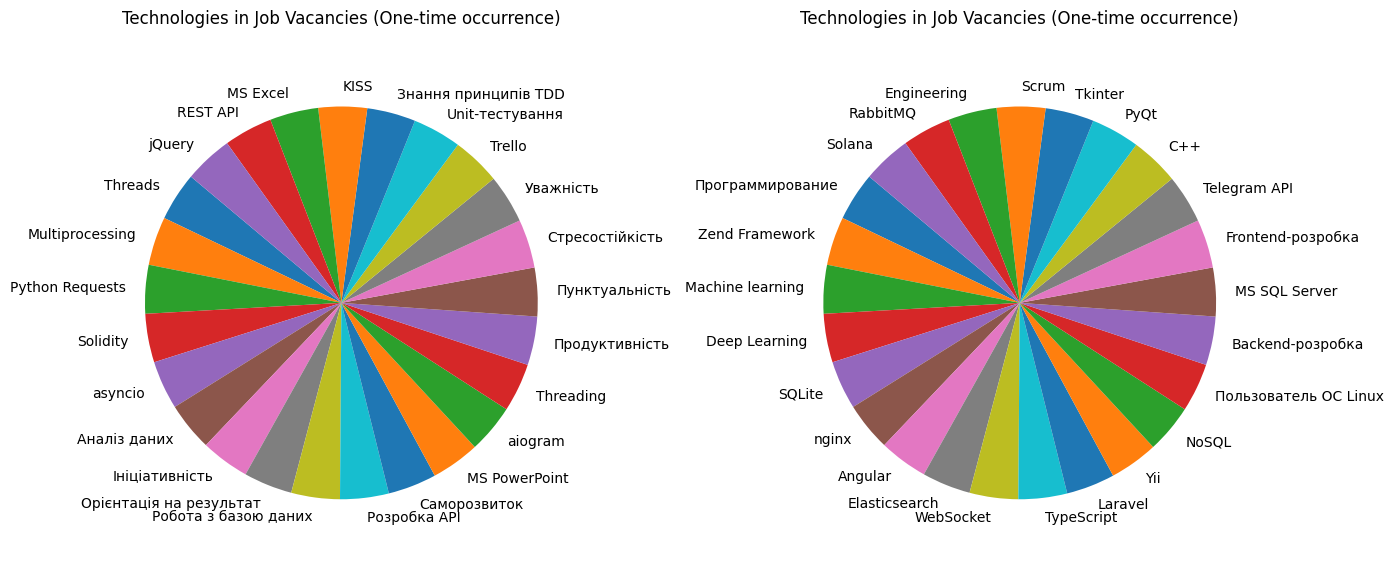

In [110]:
# Separate technologies for most wanted and unpopular

more_than_one = tech_counts[tech_counts > 1]
one_time = tech_counts[tech_counts == 1]

more_than_one_percents = more_than_one / more_than_one.sum() * 100
one_time_percent = one_time.sum() / tech_counts.sum() * 100

# Show most popular technologies
plt.figure(figsize=(14, 6))
more_than_one.plot(
    kind="bar",
    color=["skyblue", "lightgreen", "salmon", "gold"],
    edgecolor="blue",
    width=0.8,
)
plt.title("Technologies in Job Vacancies (More than one occurrence)", fontsize=16)
plt.xlabel("Technology", fontsize=12)
plt.ylabel("Number of Job Vacancies", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Show unpopular technologies
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.pie(
    one_time[: len(one_time) // 2],
    labels=one_time.index[: len(one_time) // 2],
    startangle=140,
    radius=1.5,
)
plt.title("Technologies in Job Vacancies (One-time occurrence)")
plt.axis("equal")


plt.subplot(1, 2, 2)
plt.pie(
    one_time[len(one_time) // 2 :],
    labels=one_time.index[len(one_time) // 2 :],
    startangle=140,
    radius=1.5,
)
plt.title("Technologies in Job Vacancies (One-time occurrence)")
plt.axis("equal")

plt.tight_layout()
plt.show()

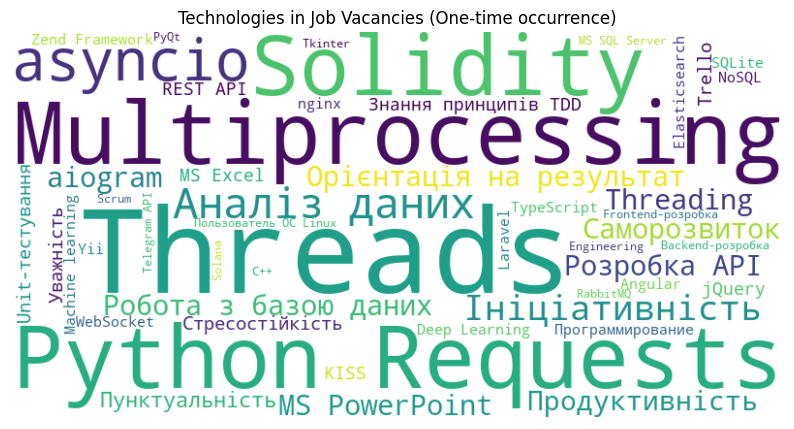

In [111]:
# Cloud of tags from unwanted technologies

from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(one_time)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Technologies in Job Vacancies (One-time occurrence)")

plt.show()

In [112]:
# Take all companies and see, what technologies each of them want

tech_by_company = {}

for company in df["company"].unique():
    company_tech = df[df["company"] == company]["technologies"]
    tech_list = []
    for tech_series in company_tech:
        if isinstance(tech_series, float) and np.isnan(tech_series):
            continue
        tech_list.extend(tech_series.split(","))
    if not tech_list:
        continue
    tech_by_company[company] = tech_list

for company, tech_list in tech_by_company.items():
    print(f"Company: {company}")
    print(f"Technologies: {tech_list}")
    print()

Company: Logivations
Technologies: ['Python', 'Responsibility', 'Machine learning', 'Deep Learning']

Company: Дервішов І.Г., ФОП
Technologies: ['CSS', 'HTML', 'JavaScript', 'Python', 'PostgreSQL', 'Flask', 'Celery', 'FastAPI']

Company: FoxmindEd
Technologies: ['CSS', 'Користувач ОС Linux', 'JavaScript', 'HTML', 'MySQL', 'Git', 'Python', 'PostgreSQL', 'Знання принципів ООП', 'Docker', 'Django', 'Django Rest Framework', 'SQLite', 'REST', 'Flask', 'AWS', 'SQLAlchemy']

Company: ISi Technology
Technologies: ['Git', 'JavaScript', 'Python', 'PostgreSQL', 'Django', 'Django Rest Framework', 'nginx', 'HTTP', 'REST', 'Angular', 'Redis', 'Elasticsearch', 'Celery', 'WebSocket']

Company: Elementica
Technologies: ['CSS', 'Користувач ОС Linux', 'JavaScript', 'Python', 'PostgreSQL', 'React', 'Agile', 'Відповідальність', 'MongoDB', 'Docker', 'Docker Compose', 'TypeScript', 'Django', 'Flask', 'AWS', 'ORM', 'FastAPI', 'SOLID Principles', 'CI/CD']

Company: Vilmate LLC
Technologies: ['Python', 'MongoDB

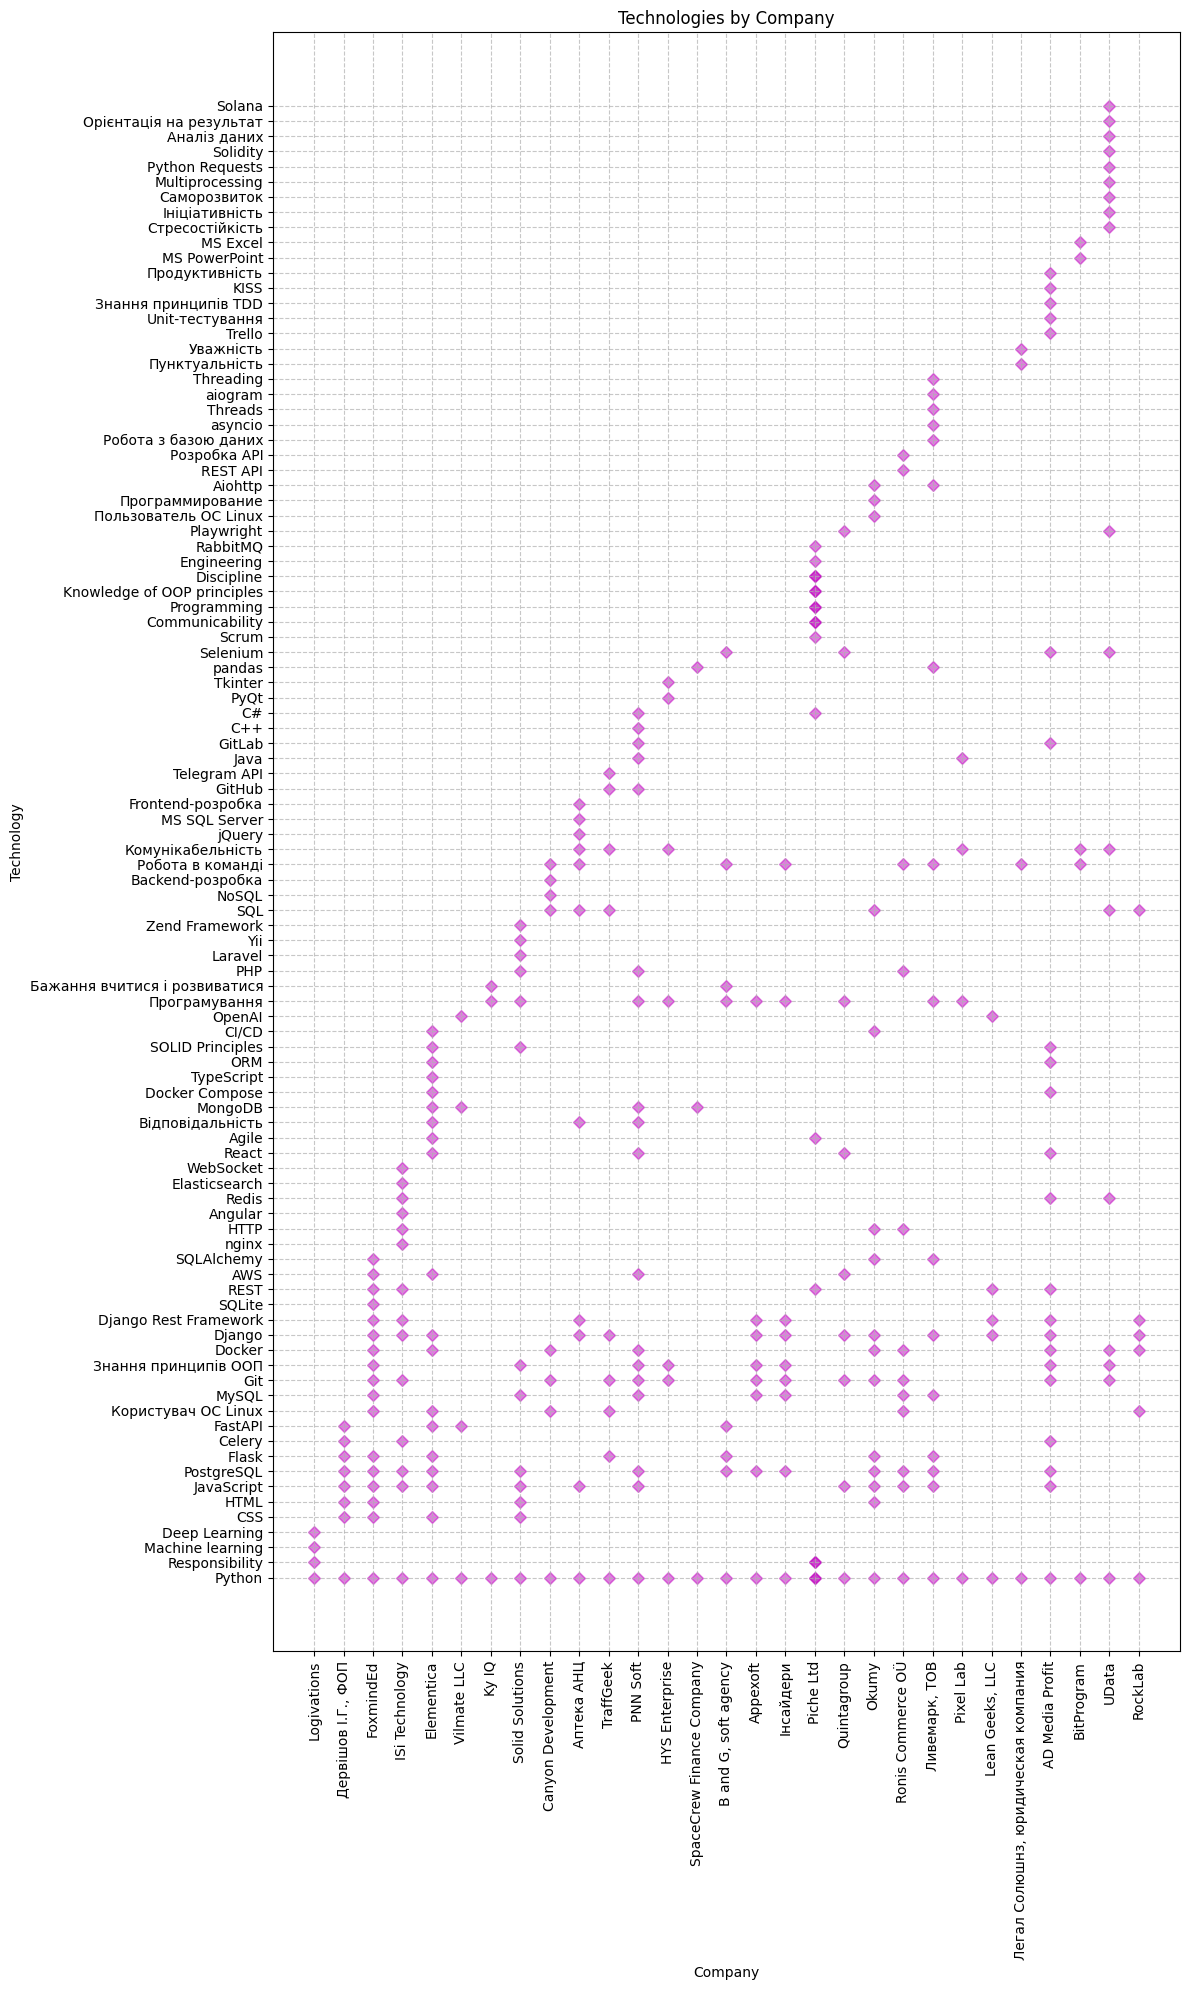

In [113]:
# Showing which companies require which technologies from job applicants

import matplotlib.pyplot as plt

companies = []
technologies = []

for company, tech_list in tech_by_company.items():
    companies.extend([company] * len(tech_list))
    technologies.extend(tech_list)

plt.figure(figsize=(12, 20))
plt.scatter(companies, technologies, marker="D", color="m", alpha=0.5)

plt.title("Technologies by Company")
plt.xlabel("Company")
plt.ylabel("Technology")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

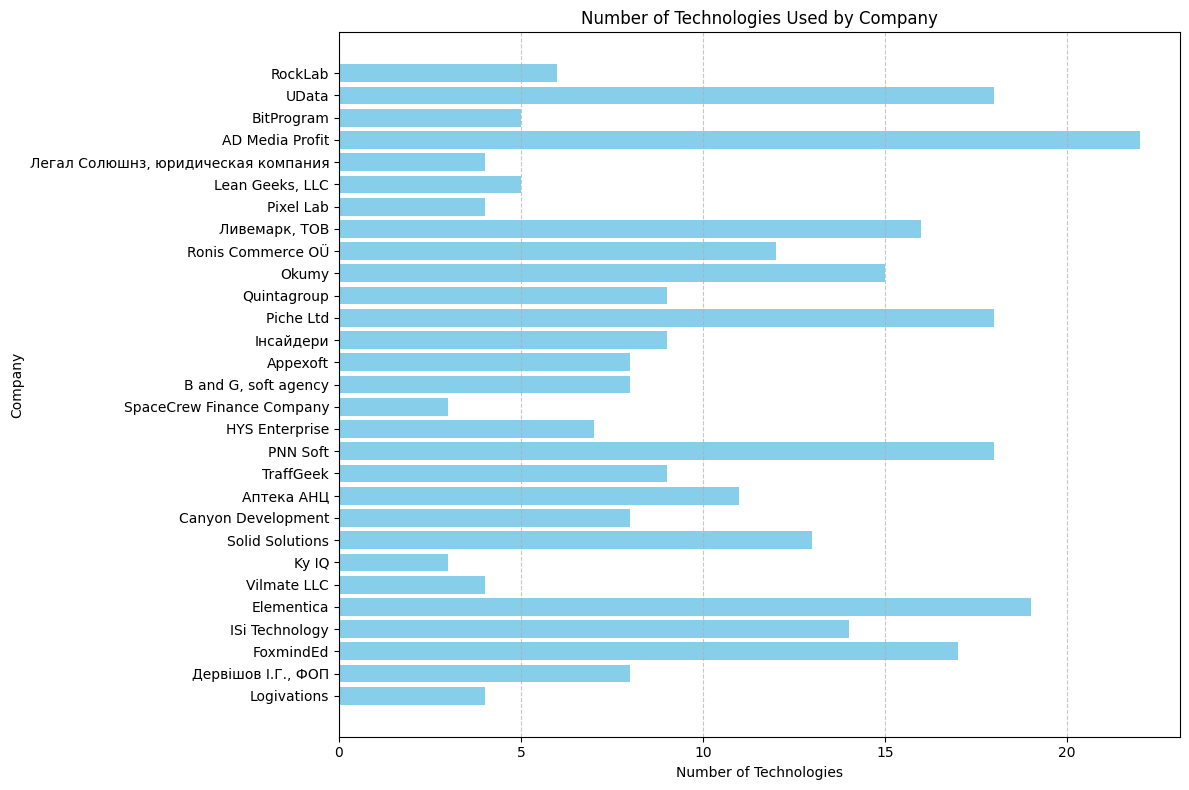

In [119]:
# Showing which companies how much technology they require from job applicants

companies_list = list(tech_by_company.keys())
num_technologies_list = [len(tech_list) for tech_list in tech_by_company.values()]

df = pd.DataFrame(
    {"Company": companies_list, "Number of Technologies": num_technologies_list}
)

df = df.sort_values("Number of Technologies", ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(companies_list, num_technologies_list, color="skyblue")

plt.title("Number of Technologies Used by Company")
plt.xlabel("Number of Technologies")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

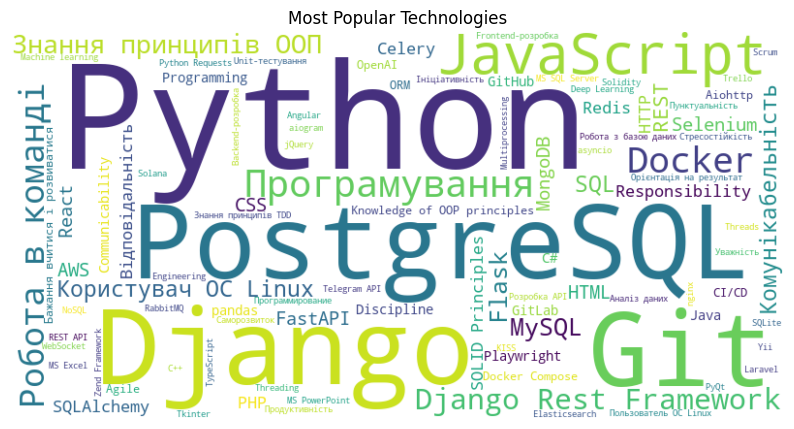

In [118]:
# Cloud of tags from most popular technologies

wordcloud = WordCloud(
    width=800, height=400, background_color="white"
).generate_from_frequencies(tech_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Popular Technologies")
plt.show()

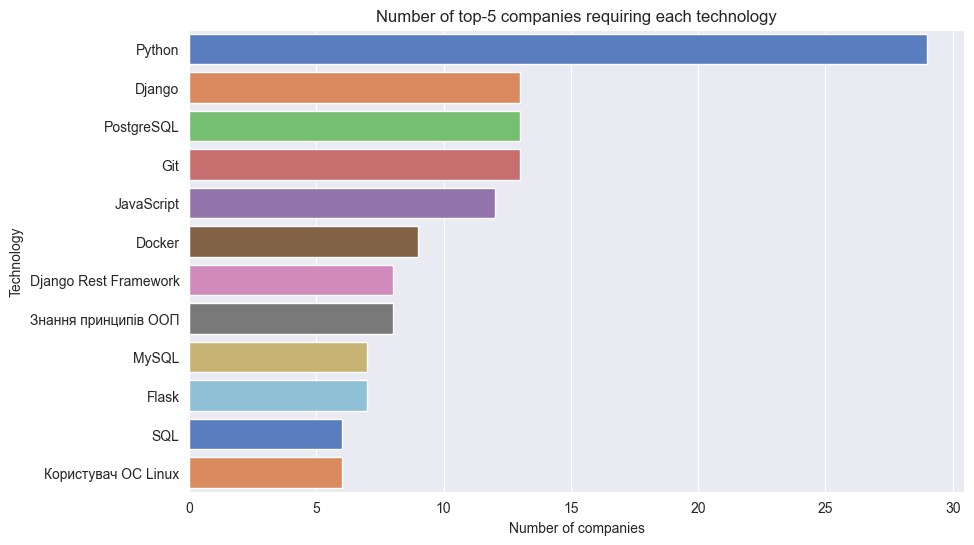

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("jobs.csv")
df = df.explode("technologies")
df["technologies"] = df["technologies"].str.split(",")
df = df.explode("technologies")


df_subset = df[["technologies", "company"]]

df_grouped = (
    df_subset.groupby(["company", "technologies"]).size().reset_index(name="counts")
)

top_companies = df_grouped["company"].value_counts().nlargest(5).index

df_top_companies = df_grouped[df_grouped["company"].isin(top_companies)]

tech_list = [
    "Python",
    "Django",
    "PostgreSQL",
    "Git",
    "JavaScript",
    "Docker",
    "Django Rest Framework",
    "Знання принципів ООП",
    "MySQL",
    "Flask",
    "SQL",
    "Користувач ОС Linux",
]

results = []

for tech in tech_list:
    num_companies = df[df["technologies"] == tech]["company"].nunique()
    results.append({"Technology": tech, "Number of Companies": num_companies})

df_results = pd.DataFrame(results)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Number of Companies",
    y="Technology",
    hue="Technology",
    data=df_results,
    errorbar=None,
    palette="muted",
    legend=False,
)

plt.title("Number of top-5 companies requiring each technology")
plt.xlabel("Number of companies")
plt.ylabel("Technology")
plt.show()

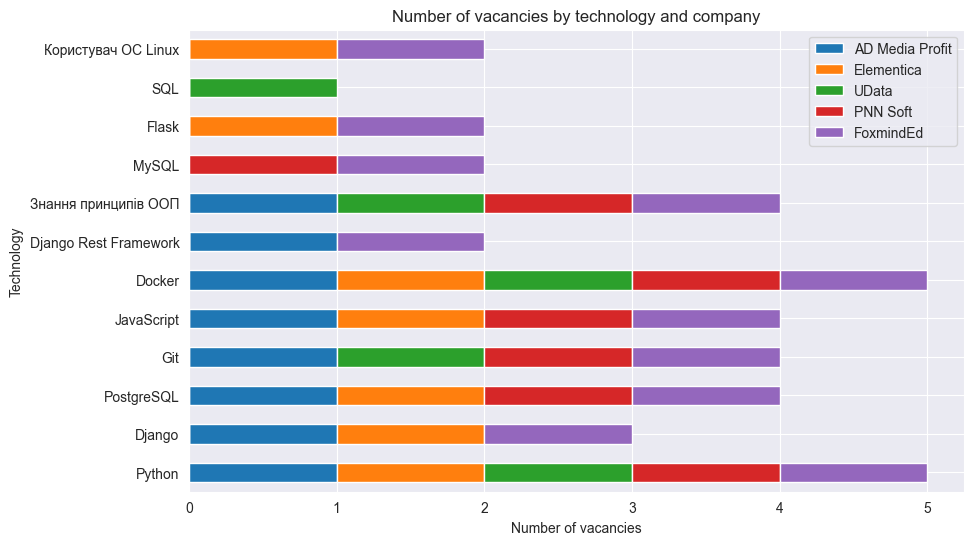

In [5]:
df_results = pd.DataFrame(index=tech_list)

for company in top_companies:
    df_company = df_top_companies[df_top_companies["company"] == company]
    tech_counts = df_company["technologies"].value_counts()
    df_results[company] = tech_counts

df_results.fillna(0, inplace=True)

df_results.plot(kind="barh", stacked=True, figsize=(10, 6))
plt.title("Number of vacancies by technology and company")
plt.xlabel("Number of vacancies")
plt.ylabel("Technology")
plt.show()

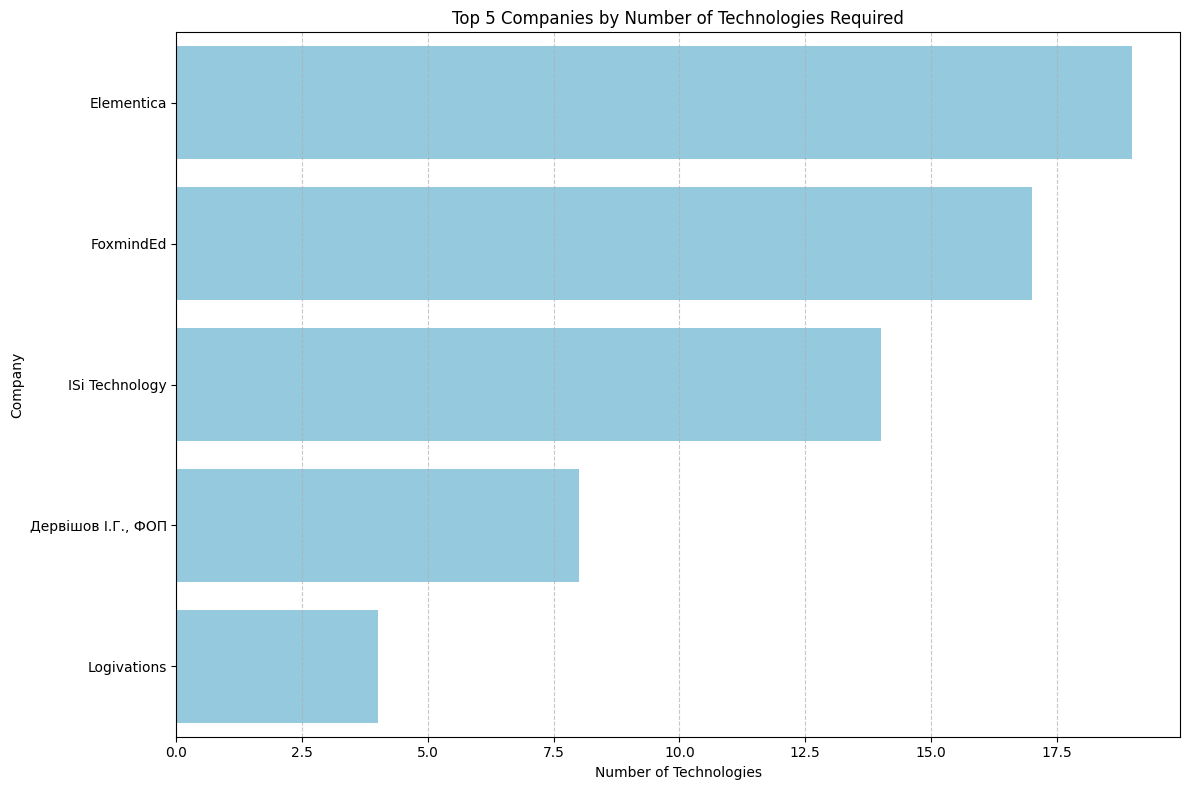

In [132]:
# top companies, that want
# Создаем словарь для хранения результатов
tech_by_company = {
    "Logivations": ["Python", "Responsibility", "Machine learning", "Deep Learning"],
    "Дервішов І.Г., ФОП": [
        "CSS",
        "HTML",
        "JavaScript",
        "Python",
        "PostgreSQL",
        "Flask",
        "Celery",
        "FastAPI",
    ],
    "FoxmindEd": [
        "CSS",
        "Користувач ОС Linux",
        "JavaScript",
        "HTML",
        "MySQL",
        "Git",
        "Python",
        "PostgreSQL",
        "Знання принципів ООП",
        "Docker",
        "Django",
        "Django Rest Framework",
        "SQLite",
        "REST",
        "Flask",
        "AWS",
        "SQLAlchemy",
    ],
    "ISi Technology": [
        "Git",
        "JavaScript",
        "Python",
        "PostgreSQL",
        "Django",
        "Django Rest Framework",
        "nginx",
        "HTTP",
        "REST",
        "Angular",
        "Redis",
        "Elasticsearch",
        "Celery",
        "WebSocket",
    ],
    "Elementica": [
        "CSS",
        "Користувач ОС Linux",
        "JavaScript",
        "Python",
        "PostgreSQL",
        "React",
        "Agile",
        "Відповідальність",
        "MongoDB",
        "Docker",
        "Docker Compose",
        "TypeScript",
        "Django",
        "Flask",
        "AWS",
        "ORM",
        "FastAPI",
        "SOLID Principles",
        "CI/CD",
    ],
}

companies_list = list(tech_by_company.keys())
num_technologies_list = [len(tech_list) for tech_list in tech_by_company.values()]

df = pd.DataFrame(
    {"Company": companies_list, "Number of Technologies": num_technologies_list}
)

df = df.sort_values("Number of Technologies", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Number of Technologies", y="Company", data=df, color="skyblue")

plt.title("Top 5 Companies by Number of Technologies Required")
plt.xlabel("Number of Technologies")
plt.ylabel("Company")
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()